# -------------------------------- Kaggle Competition -----------------------------------

In [77]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, FunctionTransformer, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

In [78]:
train_csv = '../data/train.csv'
train = pd.read_csv(train_csv)

In [79]:
test_csv = '../data/test.csv'
test = pd.read_csv(test_csv)

In [80]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 3000)

In [81]:
train.shape

(2051, 81)

In [82]:
test.shape

(879, 80)

In [83]:
list(train.columns)

['Id',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Are

## 01_EDA_and_Cleaning.ipynb   

In [84]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [85]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf           0.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        Gd            Av            GLQ         554.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        TA            No            BLQ         609.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0       1020.0         1020.0    GasA         Gd           N   
1           0.0       1967.0         1967.0    GasA         TA           Y   
2           0.0        100.0          654.0    GasA         Ex           Y   
3           0.0        968.0          968.0    GasA         TA           Y   
4           0.0        785.0         1394.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          0              4   
1             0.0             0.0          2          0              6   
2             1.0             0.0          2          1              3   
3             0.0             0.0        

### Looking for null values:

In [86]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [87]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [88]:
# Replacing the NaN values to 0 in numeric columns and to . in string columns.
#Code taken from: https://stackoverflow.com/questions/34913590/fillna-in-multiple-columns-in-place-in-python-pandas
train = train.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
test = test.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))

In [89]:
train.isnull().sum()# No missing values now

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [90]:
test.isnull().sum()# No missing values now

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

### Checking the types

In [91]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [92]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [93]:
train.select_dtypes(include='object')

MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0           RL   Pave     .       IR1          Lvl    AllPub    CulDSac   
1           RL   Pave     .       IR1          Lvl    AllPub    CulDSac   
2           RL   Pave     .       Reg          Lvl    AllPub     Inside   
3           RL   Pave     .       Reg          Lvl    AllPub     Inside   
4           RL   Pave     .       IR1          Lvl    AllPub     Inside   
5           RL   Pave     .       IR1          Lvl    AllPub     Corner   
6           RM   Pave     .       Reg          Lvl    AllPub     Inside   
7           RL   Pave     .       IR1          Lvl    AllPub     Inside   
8           RL   Pave     .       Reg          Lvl    AllPub     Inside   
9           RL   Pave     .       IR1          HLS    AllPub     Inside   
10          RM   Pave     .       Reg          Lvl    AllPub     Inside   
11          RL   Pave     .       IR1          Lvl    AllPub     Inside   
12          RL   Pave     .       Reg          Bnk    AllPub        FR2   
13          FV   Pave  Pave       Reg          Lvl    AllPub     Inside   
14          RL   Pave     .       Reg          Lvl    AllPub     Inside   
15          RL   Pave     .       Reg          Lvl    AllPub     Inside   
16          RM   Pave  Grvl       Reg          Lvl    AllPub     Inside   
17          RL   Pave     .       Reg          Lvl    AllPub     Corner   
18          RL   Pave     .       Reg          Lvl    AllPub     Inside   
19          FV   Pave     .       Reg          Lvl    AllPub     Inside   
20          RL   Pave     .       Reg          Lvl    AllPub     Inside   
21          RL   Pave     .       IR1          Lvl    AllPub     Inside   
22          RL   Pave     .       IR1          Lvl    AllPub     Corner   
23          RL   Pave     .       IR1          Lvl    AllPub     Inside   
24          RL   Pave     .       Reg          Bnk    AllPub     Inside   
25          RL   Pave     .       IR1          Lvl    AllPub     Corner   
26          RL   Pave     .       Reg          Lvl    AllPub     Inside   
27          RL   Pave  Grvl       IR1          HLS    AllPub     Inside   
28     C (all)   Pave     .       Reg          Lvl    AllPub     Inside   
29          RL   Pave     .       Reg          Lvl    AllPub     Corner   
30          RL   Pave     .       Reg          Lvl    AllPub     Inside   
31          RL   Pave     .       IR1          HLS    AllPub     Corner   
32          RL   Pave     .       IR1          Lvl    AllPub    CulDSac   
33          RL   Pave     .       Reg          Lvl    AllPub     Inside   
34          RL   Pave     .       Reg          Lvl    AllPub     Inside   
35          RL   Pave     .       IR1          HLS    AllPub     Inside   
36          RM   Pave     .       Reg          Lvl    AllPub     Inside   
37          RL   Pave     .       IR1          Lvl    AllPub     Inside   
38          RL   Pave     .       Reg          Lvl    AllPub     Inside   
39          RL   Pave     .       IR2          Lvl    AllPub     Inside   
40          RL   Pave     .       Reg          Lvl    AllPub     Inside   
41          RL   Pave     .       Reg          Lvl    AllPub     Inside   
42          RL   Pave     .       IR1          Lvl    AllPub     Corner   
43          RM   Pave  Grvl       Reg          Lvl    AllPub     Inside   
44          RL   Pave     .       Reg          Lvl    AllPub     Inside   
45          RL   Pave     .       IR1          HLS    AllPub     Inside   
46          RL   Pave  Grvl       Reg          Lvl    AllPub     Inside   
47          RL   Pave     .       Reg          HLS    AllPub     Inside   
48          RL   Pave     .       Reg          Lvl    AllPub     Inside   
49          RL   Pave     .       Reg          Lvl    AllPub     Inside   
50          FV   Pave     .       Reg          Lvl    AllPub     Inside   
51          RL   Pave     .       Reg          Lvl    AllPub     Inside   
52          RL   Pave     .   

 The types match across the two datasets
 No unwanted types

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5]),
 <a list of 39 Text yticklabel objects>)

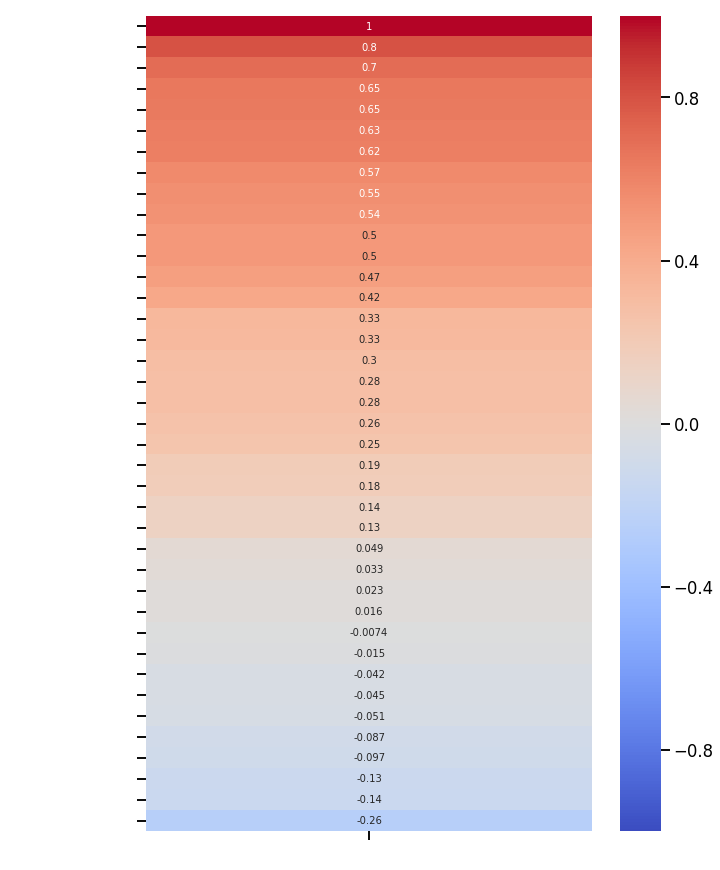

In [94]:
plt.figure(figsize=(10, 15))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1, yticklabels='auto' )
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')


# 02_Preprocessing_and_Feature_Engineering.ipynb  

We will want to merge the data sets in order to work on both of them simultaneously.

### Merging

In [95]:
train_objs_num = len(train)

In [96]:
dataset = pd.concat(objs=[train, test], axis=0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




### Preprocessing & Feature Engineering

In [97]:
### Dividing the MS Zoning between residences and non-residence
#dataset['MS Zoning'].replace(['RL','RM','RH','RP'], 1, inplace=True)
#dataset['MS Zoning'].replace(['FV','C','A','I', 'C (all)', 'A (agr)','I (all)'], 0, inplace=True)
#dataset['MS Zoning'].value_counts()

In [98]:
### Assumptions: 
# -> We assume that the condition of the price of the house will be affected by the contion 
# as well as the square footage of the different areas in the house.
# Therefore: 
# (Garage Condition)
dataset['Garage Cond'].replace(['Ex'], 5, inplace=True)
dataset['Garage Cond'].replace(['Gd'], 4, inplace=True)
dataset['Garage Cond'].replace(['TA'], 3, inplace=True)
dataset['Garage Cond'].replace(['Fa'], 2, inplace=True)
dataset['Garage Cond'].replace(['Po'], 1, inplace=True)
dataset['Garage Cond'].replace(['.'], 1, inplace=True)
# (Garage Area) 
### Interaction Term:
dataset['Garage Cond * Garage Area'] = dataset['Garage Cond'] * dataset['Garage Area']

In [99]:
### Continuation: --> Not too much correlation between Bsmt cond and Bsmt qual
# ( Basement Cond)
dataset['Bsmt Cond'].replace(['Ex','Gd','TA'], 1, inplace=True)
dataset['Bsmt Cond'].replace(['Fa','Po','.'], 0, inplace=True)
# (Basement Qual)
dataset['Bsmt Qual'].replace(['Ex'], 5, inplace=True)
dataset['Bsmt Qual'].replace(['Gd'], 4, inplace=True)
dataset['Bsmt Qual'].replace(['TA'], 3, inplace=True)
dataset['Bsmt Qual'].replace(['Fa'], 2, inplace=True)
dataset['Bsmt Qual'].replace(['Po'], 1, inplace=True)
dataset['Bsmt Qual'].replace(['.'], 1, inplace=True)
### Interaction terms:
dataset['Bsmt Qual* Total Bsmt SF'] = dataset['Bsmt Qual'] * dataset['Total Bsmt SF']

In [100]:
### Continuation:
#(Bsmt Fin Type 1)
dataset['BsmtFin Type 1'].replace(['GLQ','ALQ'], 1, inplace=True)
dataset['BsmtFin Type 1'].replace(['BLQ','Rec','LwQ','Unf','.'], 0, inplace=True)
#(Bsmt Fin1 SF)
### Interaction terms:
dataset['BsmtFin Type 1 * BsmtFin SF 1'] = dataset['BsmtFin Type 1'] * dataset['BsmtFin SF 1']

In [101]:
### Continuation: --> not too much correlation (but improves their individual values)
#(Bsmt Fin Type 2)
dataset['BsmtFin Type 2'].replace(['GLQ','ALQ'], 1, inplace=True)
dataset['BsmtFin Type 2'].replace(['BLQ','Rec','LwQ','Unf','.'], 0, inplace=True)
#(Bsmt Fin2 SF)
### Interaction terms:
dataset['BsmtFin Type 2 * BsmtFin SF 2'] = dataset['BsmtFin Type 2'] * dataset['BsmtFin SF 2']


We will separate those categorical variables with the most correlation with price from the rest.

In [102]:
dataset['Lot Shape']=dataset['Lot Shape'].map(lambda tta: 1 if tta =='Reg' else 0)

In [103]:
dataset['Utilities']=dataset['Utilities'].map(lambda uts: 1 if uts =='AllPub' else 0)

In [104]:
dataset['Garage Finish']=dataset['Garage Finish'].map(lambda garf: 1 if garf =='Fin' else 0)

In [105]:
dataset['Street'] = dataset['Street'].map({'Pave': 1, 'Grvl': 0})

In [106]:
dataset['Fireplaces']=dataset['Fireplaces'].map(lambda fp: 1 if fp >=1 else 0)

In [107]:
dataset['Functional'].replace(['Typ'], 1, inplace=True)
dataset['Functional'].replace(['Min1','Min2','Mod','Maj1','Maj2','Sal','Sev'], 0, inplace=True)

In [108]:
dataset['Exter Qual'].replace(['Gd','Ex'], 1, inplace=True)
dataset['Exter Qual'].replace(['Po','Fa', 'TA'], 0, inplace=True)

In [109]:
dataset['Exter Cond'].replace(['Gd','Ex'], 1, inplace=True)
dataset['Exter Cond'].replace(['Fa', 'TA'], 0, inplace=True)

In [110]:
dataset['Mas Vnr Type'].replace(['BrkFace','BrkCmn','Stone'], 1, inplace=True)
dataset['Mas Vnr Type'].replace(['None', '.'], 0, inplace=True)

In [111]:
dataset['Fence'].replace(['GdPrv','GdWo','MnWw','MnPrv'], 1, inplace=True)
dataset['Fence'].replace(['.'], 0, inplace=True)

In [112]:
dataset['Pool QC'].replace(['Gd','Ex','TA','Fa'], 1, inplace=True)
dataset['Pool QC'].replace(['.'], 0, inplace=True)

In [113]:
dataset['Bsmt Exposure'].replace(['Gd','Av'], 1, inplace=True)
dataset['Bsmt Exposure'].replace(['Mn','No', '.'], 0, inplace=True)

In [114]:
dataset['Heating QC'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Heating QC'].replace(['Po','Fa'], 0, inplace=True)

In [115]:
dataset['Kitchen Qual'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Kitchen Qual'].replace(['Po','Fa'], 0, inplace=True)

In [116]:
dataset['Fireplace Qu'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Fireplace Qu'].replace(['Po','Fa','.'], 0, inplace=True)

In [117]:
dataset['Garage Qual'].replace(['Gd','Ex','TA'], 1, inplace=True)
dataset['Garage Qual'].replace(['Po','Fa','.'], 0, inplace=True)

### Engineering some new features

In [118]:
# Modern houses sell for a higher price than old ones
dataset['Modern']=train['Year Built'].map(lambda yb: 1 if yb >=2000 else 0)

In [119]:
# Good quality houses sell for a higher price than low quality
#dataset['Gd_Qual']=dataset['Overall Qual'].map(lambda gqal: 1 if gqal >=6 else 0)

In [120]:
# Large hoouses sell for a higher price than old ones
dataset['Large']=dataset['Lot Area'].map(lambda tta: 1 if tta >=11513 else 0)

In [121]:
dataset['Overall Cond'].replace(['Ex'], 10, inplace=True)
dataset['Overall Cond'].replace(['Gd'], 8, inplace=True)
dataset['Overall Cond'].replace(['TA'], 6, inplace=True)
dataset['Overall Cond'].replace(['Fa'], 4, inplace=True)
dataset['Overall Cond'].replace(['Po'], 2, inplace=True)
dataset['Overall Cond'].replace(['.'], 0, inplace=True)

In [122]:
dataset['Overall Cond'].dtype

dtype('int64')

### Making Dummies for the rest of the variables

First we get dummies for the numerical values which are useful:

In [123]:
#dataset = pd.get_dummies(dataset, columns=['Overall Qual'], drop_first=True);

In [124]:
#dataset = pd.get_dummies(dataset, columns=['Overall Cond'], drop_first=True);

Then we get dummies for the remaining categorical values:

In [125]:
dataset_preprocessed = pd.get_dummies(dataset)

### Un-merging (splitting)

In [126]:
train = dataset_preprocessed[:train_objs_num]
test = dataset_preprocessed[train_objs_num:]

In [127]:
train.head()

1st Flr SF  2nd Flr SF  3Ssn Porch  Bedroom AbvGr  Bsmt Cond  \
0         725         754           0              3          1   
1         913        1209           0              4          1   
2        1057           0           0              3          1   
3         744         700           0              3          1   
4         831         614           0              3          1   

   Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  \
0              0             0.0             0.0          3        192.0   
1              0             1.0             0.0          4        276.0   
2              0             1.0             0.0          3        326.0   
3              0             0.0             0.0          4        384.0   
4              0             0.0             0.0          2        676.0   

   BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Enclosed Porch  \
0         533.0           0.0               1               0               0   
1         637.0           0.0               1               0               0   
2         731.0           0.0               1               0               0   
3           0.0           0.0               0               0               0   
4           0.0           0.0               0               0               0   

   Exter Qual  Fence  Fireplace Qu  Fireplaces  Full Bath  Functional  \
0           1      0             0           0          2           1   
1           1      0             1           1          2           1   
2           0      0             0           0          1           1   
3           0      0             0           0          2           1   
4           0      0             0           0          2           1   

   Garage Area  Garage Cars  Garage Cond  Garage Finish  Garage Qual  \
0        475.0          2.0            3              0            1   
1        559.0          2.0            3              0            1   
2        246.0          1.0            3              0            1   
3        400.0          2.0            3              1            1   
4        484.0          2.0            3              0            1   

   Garage Yr Blt  Gr Liv Area  Half Bath  Heating QC   Id  Kitchen AbvGr  \
0         1976.0         1479          1           1  109              1   
1         1997.0         2122          1           1  544              1   
2         1953.0         1057          0           1  153              1   
3         2007.0         1444          1           1  318              1   
4         1957.0         1445          0           1  255              1   

   Kitchen Qual  Lot Area  Lot Frontage  Lot Shape  Low Qual Fin SF  \
0             1     13517           0.0          0                0   
1             1     11492          43.0          0                0   
2             1      7922          68.0          1                0   
3             1      9802          73.0          1                0   
4             1     14235          82.0          0                0   

   MS SubClass  Mas Vnr Area  Misc Val  Mo Sold  Open Porch SF  Overall Cond  \
0           60         289.0         0        3             44             8   
1           60         132.0         0        4             74             5   
2           20           0.0         0        1             52             7   
3           60           0.0         0        4              0             5   
4           50           0.0         0        3             59             8   

   Overall Qual        PID  Pool Area  Pool QC  SalePrice  Screen Porch  \
0             6  533352170          0        0   130500.0             0   
1             7  531379050          0        0   220000.0             0   
2             5  535304180          0        0   109000.0             0   
3             5  916386060          0        0   174000.0             0   
4             6  906425045          0       

In [128]:
test.head()

1st Flr SF  2nd Flr SF  3Ssn Porch  Bedroom AbvGr  Bsmt Cond  \
0         908        1020           0              4          1   
1        1967           0           0              6          1   
2         664         832           0              3          1   
3         968           0           0              2          1   
4        1394           0           0              3          1   

   Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath  Bsmt Qual  Bsmt Unf SF  \
0              0             0.0             0.0          2       1020.0   
1              0             0.0             0.0          4       1967.0   
2              1             1.0             0.0          4        100.0   
3              0             0.0             0.0          3        968.0   
4              0             1.0             0.0          4        785.0   

   BsmtFin SF 1  BsmtFin SF 2  BsmtFin Type 1  BsmtFin Type 2  Enclosed Porch  \
0           0.0           0.0               0               0             112   
1           0.0           0.0               0               0               0   
2         554.0           0.0               1               0               0   
3           0.0           0.0               0               0             184   
4         609.0           0.0               0               0               0   

   Exter Qual  Fence  Fireplace Qu  Fireplaces  Full Bath  Functional  \
0           0      0             0           0          2           1   
1           0      0             0           0          2           1   
2           1      0             1           1          2           1   
3           1      0             0           0          1           1   
4           0      0             1           1          1           1   

   Garage Area  Garage Cars  Garage Cond  Garage Finish  Garage Qual  \
0        440.0          1.0            1              0            0   
1        580.0          2.0            3              1            1   
2        426.0          2.0            3              0            1   
3        480.0          2.0            3              0            0   
4        514.0          2.0            3              0            1   

   Garage Yr Blt  Gr Liv Area  Half Bath  Heating QC    Id  Kitchen AbvGr  \
0         1910.0         1928          0           1  2658              2   
1         1977.0         1967          0           1  2718              2   
2         2006.0         1496          1           1  2414              1   
3         1935.0          968          0           1  1989              1   
4         1963.0         1394          1           1   625              1   

   Kitchen Qual  Lot Area  Lot Frontage  Lot Shape  Low Qual Fin SF  \
0             0      9142          69.0          1                0   
1             1      9662           0.0          0                0   
2             1     17104          58.0          0                0   
3             1      8520          60.0          1                0   
4             1      9500           0.0          0                0   

   MS SubClass  Mas Vnr Area  Misc Val  Mo Sold  Open Porch SF  Overall Cond  \
0          190           0.0         0        4             60             8   
1           90           0.0         0        8              0             4   
2           60           0.0         0        9             24             5   
3           30           0.0         0        7              0             6   
4           20         247.0         0        7             76             5   

   Overall Qual        PID  Pool Area  Pool QC  SalePrice  Screen Porch  \
0             6  902301120          0        0        NaN             0   
1             5  905108090          0        0        NaN             0   
2             7  528218130          0        0        NaN             0   
3             5  902207150          0        0        NaN             0   
4             6  535105100          0 

In [129]:
# We also need to droop the SalePrice for the 'Test' dataset
test.drop(['SalePrice'], axis=1, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
train.shape 

(2051, 242)

In [131]:
test.shape # test has one column less than train (SalePrice)

(879, 241)

In [132]:
train.isnull().sum()

1st Flr SF                       0
2nd Flr SF                       0
3Ssn Porch                       0
Bedroom AbvGr                    0
Bsmt Cond                        0
Bsmt Exposure                    0
Bsmt Full Bath                   0
Bsmt Half Bath                   0
Bsmt Qual                        0
Bsmt Unf SF                      0
BsmtFin SF 1                     0
BsmtFin SF 2                     0
BsmtFin Type 1                   0
BsmtFin Type 2                   0
Enclosed Porch                   0
Exter Qual                       0
Fence                            0
Fireplace Qu                     0
Fireplaces                       0
Full Bath                        0
Functional                       0
Garage Area                      0
Garage Cars                      0
Garage Cond                      0
Garage Finish                    0
Garage Qual                      0
Garage Yr Blt                    0
Gr Liv Area                      0
Half Bath           

In [133]:
test.isnull().sum()

1st Flr SF                       0
2nd Flr SF                       0
3Ssn Porch                       0
Bedroom AbvGr                    0
Bsmt Cond                        0
Bsmt Exposure                    0
Bsmt Full Bath                   0
Bsmt Half Bath                   0
Bsmt Qual                        0
Bsmt Unf SF                      0
BsmtFin SF 1                     0
BsmtFin SF 2                     0
BsmtFin Type 1                   0
BsmtFin Type 2                   0
Enclosed Porch                   0
Exter Qual                       0
Fence                            0
Fireplace Qu                     0
Fireplaces                       0
Full Bath                        0
Functional                       0
Garage Area                      0
Garage Cars                      0
Garage Cond                      0
Garage Finish                    0
Garage Qual                      0
Garage Yr Blt                    0
Gr Liv Area                      0
Half Bath           

In [134]:
train.dtypes

1st Flr SF                         int64
2nd Flr SF                         int64
3Ssn Porch                         int64
Bedroom AbvGr                      int64
Bsmt Cond                          int64
Bsmt Exposure                      int64
Bsmt Full Bath                   float64
Bsmt Half Bath                   float64
Bsmt Qual                          int64
Bsmt Unf SF                      float64
BsmtFin SF 1                     float64
BsmtFin SF 2                     float64
BsmtFin Type 1                     int64
BsmtFin Type 2                     int64
Enclosed Porch                     int64
Exter Qual                         int64
Fence                              int64
Fireplace Qu                       int64
Fireplaces                         int64
Full Bath                          int64
Functional                         int64
Garage Area                      float64
Garage Cars                      float64
Garage Cond                        int64
Garage Finish   

# Graphs

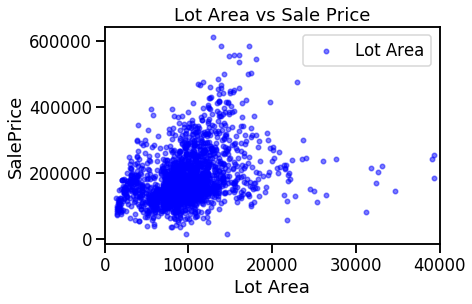

In [135]:



ax1 = train.plot(kind='scatter', x='Lot Area', y='SalePrice', label='Lot Area', alpha=0.5 ,  color='b')    
plt.title('Lot Area vs Sale Price')
plt.xlim(0,40_000)
plt.show()

<Figure size 432x216 with 0 Axes>

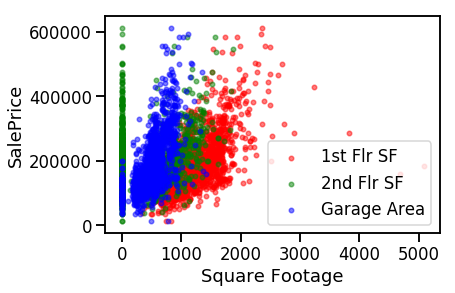

In [136]:
fig= plt.figure(figsize=(6,3))

ax1 = train.plot(kind='scatter', x='1st Flr SF', y='SalePrice', label='1st Flr SF', alpha=0.5 ,  color='r')    
ax2 = train.plot(kind='scatter', x='2nd Flr SF', y='SalePrice', label='2nd Flr SF', alpha=0.5 , color='g', ax=ax1)    
ax3 = train.plot(kind='scatter', x='Garage Area', y='SalePrice', label='Garage Area', alpha=0.5, color='b', ax=ax1)
plt.xlabel('Square Footage')
fig.savefig('test2png.png', dpi=100)

In [137]:
train.isnull().sum()

1st Flr SF                       0
2nd Flr SF                       0
3Ssn Porch                       0
Bedroom AbvGr                    0
Bsmt Cond                        0
Bsmt Exposure                    0
Bsmt Full Bath                   0
Bsmt Half Bath                   0
Bsmt Qual                        0
Bsmt Unf SF                      0
BsmtFin SF 1                     0
BsmtFin SF 2                     0
BsmtFin Type 1                   0
BsmtFin Type 2                   0
Enclosed Porch                   0
Exter Qual                       0
Fence                            0
Fireplace Qu                     0
Fireplaces                       0
Full Bath                        0
Functional                       0
Garage Area                      0
Garage Cars                      0
Garage Cond                      0
Garage Finish                    0
Garage Qual                      0
Garage Yr Blt                    0
Gr Liv Area                      0
Half Bath           

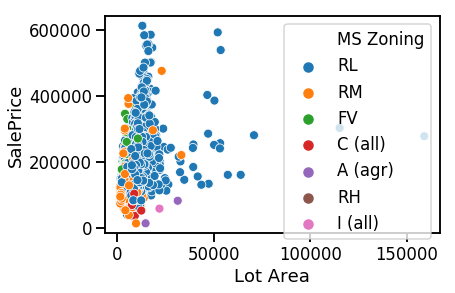

In [138]:
sns.scatterplot(x='Lot Area', y='SalePrice', hue='MS Zoning', data=dataset)

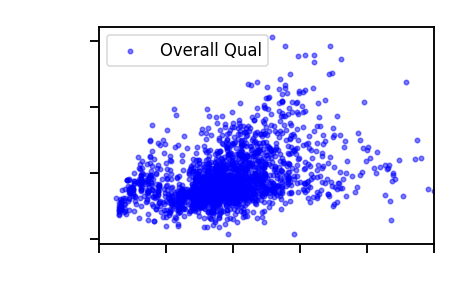

In [139]:
ax1 = train.plot(kind='scatter', x='Lot Area', y='SalePrice', label='Overall Qual', alpha=0.5 ,  color='b')
plt.title('Lot Area vs Sale Price', color='white')
plt.xlim(0,25000)
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('Lot Area',color='white')
plt.ylabel('SalePrice', color='white')


plt.show()

In [140]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import plot
%matplotlib inline

In [141]:
def line_of_best_fit(x, y):

    # Calculate the five "ingredients."
    y_bar = y.mean()
    x_bar = x.mean()
    std_y = np.std(y, ddof=1) # y.std()
    std_x = np.std(x, ddof=1) # x.std()
    r_xy = np.corrcoef(x, y)[0][1]

    # Calculate the betas.
    beta_1 = r_xy*(std_y/std_x)
    beta_0 = y_bar-(beta_1*x_bar)

    # Return line of best fit.
    return beta_1 * x + beta_0

In [142]:
dataset['Linear_Yhat'] = line_of_best_fit(dataset['Overall Qual'], dataset['SalePrice'])

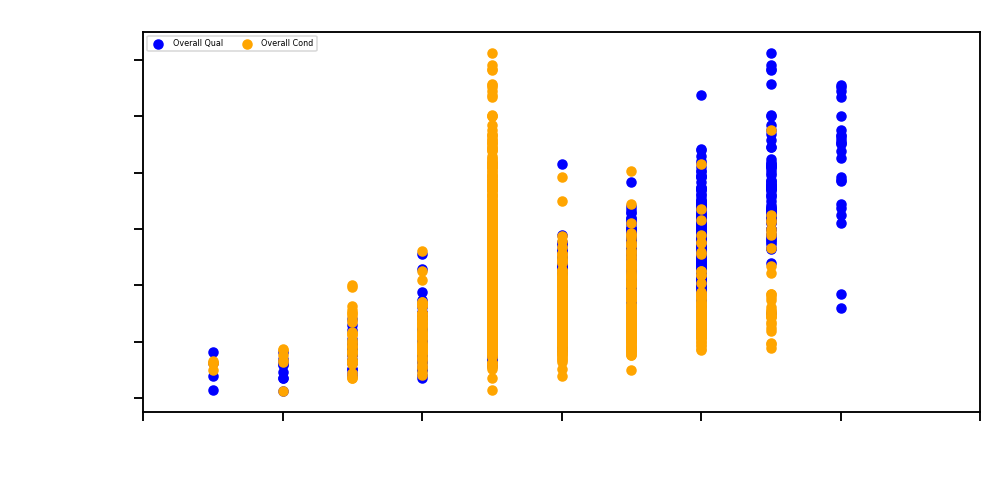

In [143]:
# Create a figure.

plt.figure(figsize=(15,7))
A = plt.scatter(dataset['Overall Qual'],
            dataset['SalePrice'], 
            color='b')

B = plt.scatter(dataset['Overall Cond'],
            dataset['SalePrice'],
            color='orange')

plt.legend((A, B),
           ('Overall Qual', 'Overall Cond'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)

plt.plot(dataset['Overall Qual'],
         dataset['Linear_Yhat'],
         color = 'black')

plt.plot(dataset['Overall Cond'],
         dataset['Linear_Yhat'],
         color = 'black')

plt.title('Overall Qual vs Overall Cond',size= 25, color='white')
plt.xlim(0,12)
plt.xticks(size=25, color='white')
plt.yticks(size= 25, color='white')
plt.xlabel('Overall Qual and Cond ',size= 25, color='white')
plt.ylabel('SalePrice', size= 25,color='white')

# Also generate a line for our prediction.


plt.show()

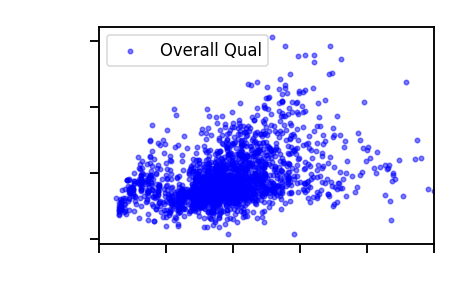

In [144]:
ax1 = train.plot(kind='scatter', x='Lot Area', y='SalePrice', label='Overall Qual', alpha=0.5 ,  color='b')
plt.title('Lot Area vs Sale Price', color='white')
plt.xlim(0,25000)
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('Lot Area',color='white')
plt.ylabel('SalePrice', color='white')

plt.plot(dataset['Overall Cond'],
         dataset['Linear_Yhat'],
         color = 'black')


plt.show()

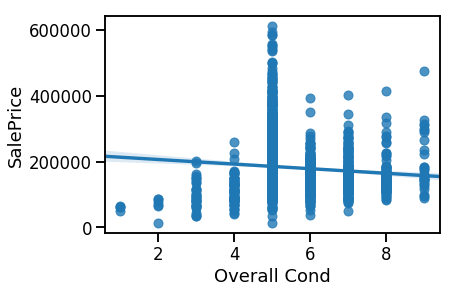

In [145]:
sns.regplot(x=dataset["Overall Cond"], y=dataset["SalePrice"])

Text(0, 0.5, 'SalePrice')

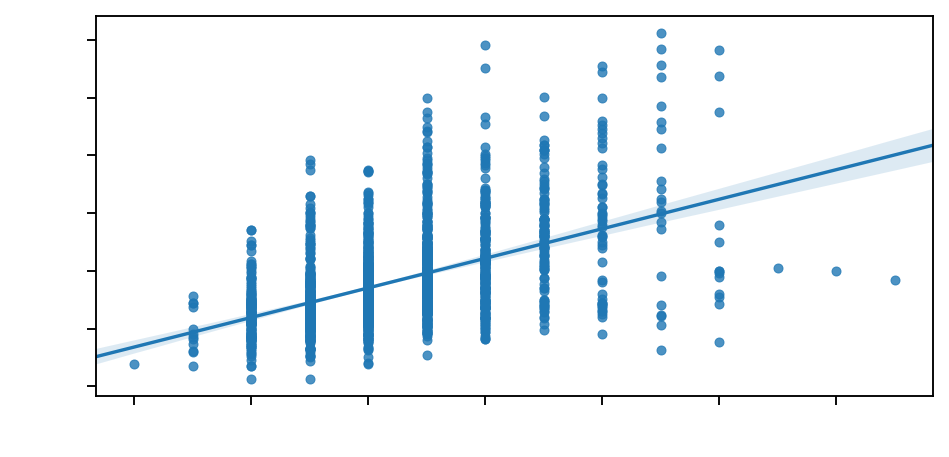

In [146]:
plt.figure(figsize=(15,7))
sns.set_context('talk')  #Everything is sized for a presentation
sns.regplot(x=dataset["TotRms AbvGrd"], y=dataset["SalePrice"])
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('TotRms AbvGrd',color='white')
plt.ylabel('SalePrice', size=15, color='white')

Text(0, 0.5, 'SalePrice')

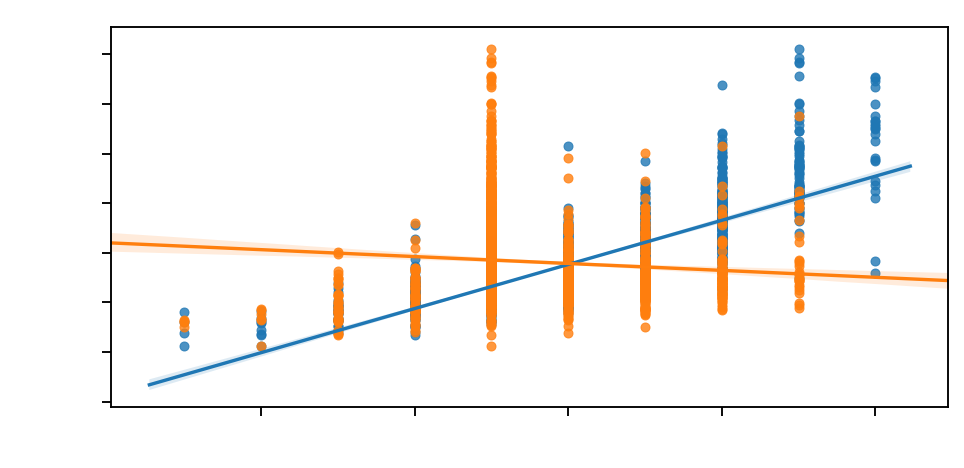

In [147]:
plt.figure(figsize=(15,7))
plt.title('Quality vs Condition', color='white')
sns.set_context('talk')  #Everything is sized for a presentation
sns.regplot(x=dataset["Overall Qual"], y=dataset["SalePrice"])
sns.regplot(x=dataset["Overall Cond"], y=dataset["SalePrice"])
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('TotRms AbvGrd',color='white')
plt.ylabel('SalePrice', color='white')

# Work on how to change color on axis and labels, and make titles.

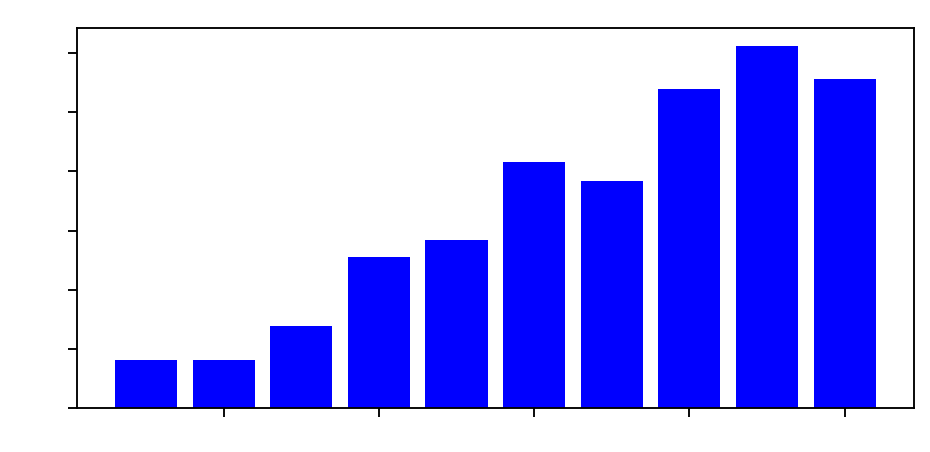

In [148]:
plt.figure(figsize=(15,7))
plt.bar(dataset['Overall Qual'], dataset["SalePrice"], color='blue')
plt.title('Overall Quality vs Sale Price', size=20, color='white')
plt.xticks(size=15, color='white')
plt.yticks(size= 15, color='white')

plt.xticks(rotation=45)
plt.show()

In [149]:
test["Yr Sold"].value_counts()

2009    202
2007    196
2008    187
2006    187
2010    107
Name: Yr Sold, dtype: int64

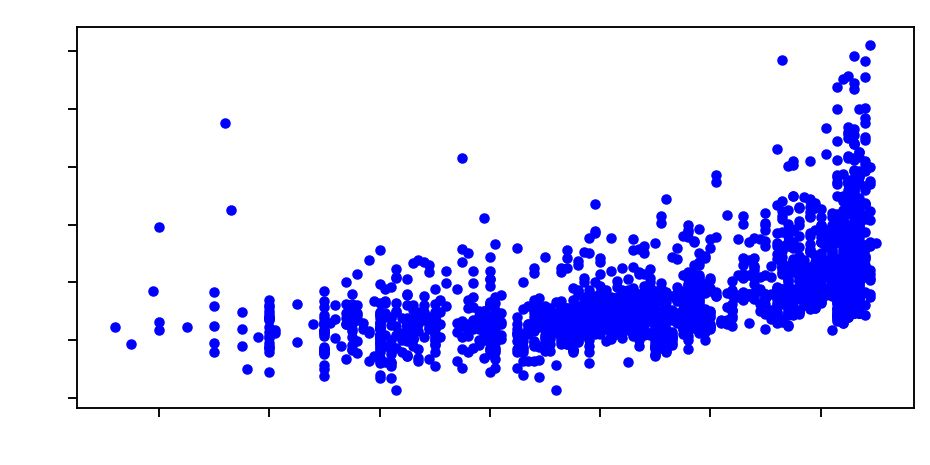

In [150]:
plt.figure(figsize=(15,7))
plt.scatter(dataset["Year Built"], dataset["SalePrice"], color='blue')
plt.title('Neighborhood vs Sale Price', size=20, color='white')
plt.xticks(size=15, color='white')
plt.yticks(size= 15, color='white')

plt.xticks(rotation=45)
plt.show()

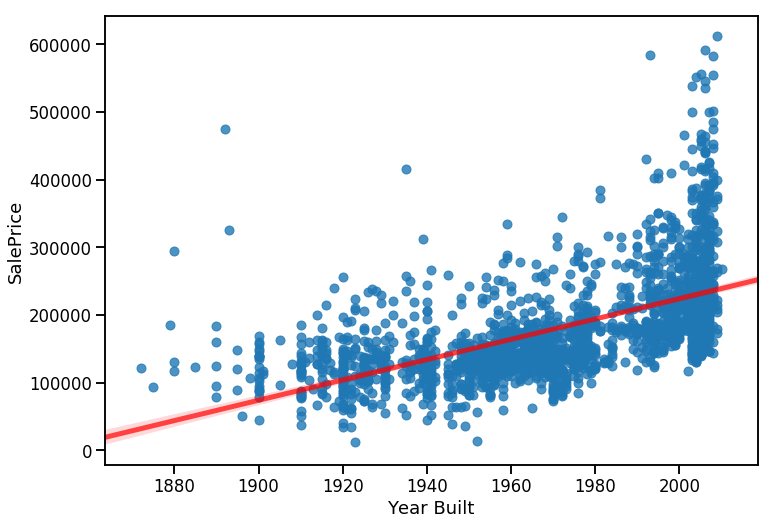

In [151]:
sns.set_context('talk')  #Everything is sized for a presentation
sns.axes_style({'ytick.color': 'white'})
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=dataset["Year Built"], y=dataset["SalePrice"], line_kws={"color":"r","alpha":0.7,"lw":5})


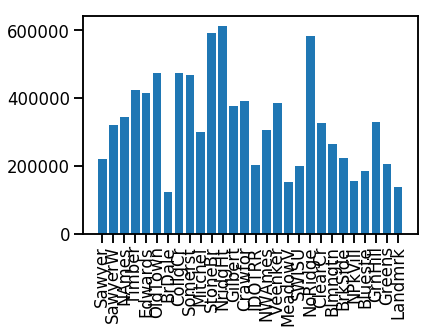

In [152]:
plt.bar(dataset['Neighborhood'], dataset['SalePrice'])
plt.xticks(rotation=90);

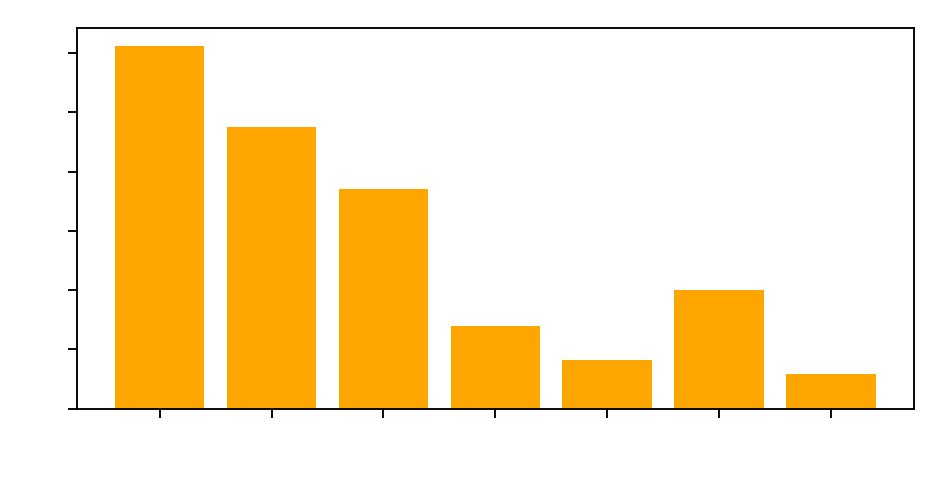

In [153]:
plt.figure(figsize=(15,7))
plt.bar(dataset['MS Zoning'], dataset['SalePrice'], color='orange')
plt.title('Zone vs Sale Price', size=20, color='white')
plt.xticks(size=15, color='white')
plt.yticks(size= 15, color='white')
plt.xticks(rotation=90);

In [163]:
#dataset.plot(x=['MS Zoning', 'Neighborhood'], y=['SalePrice'], kind="bar")

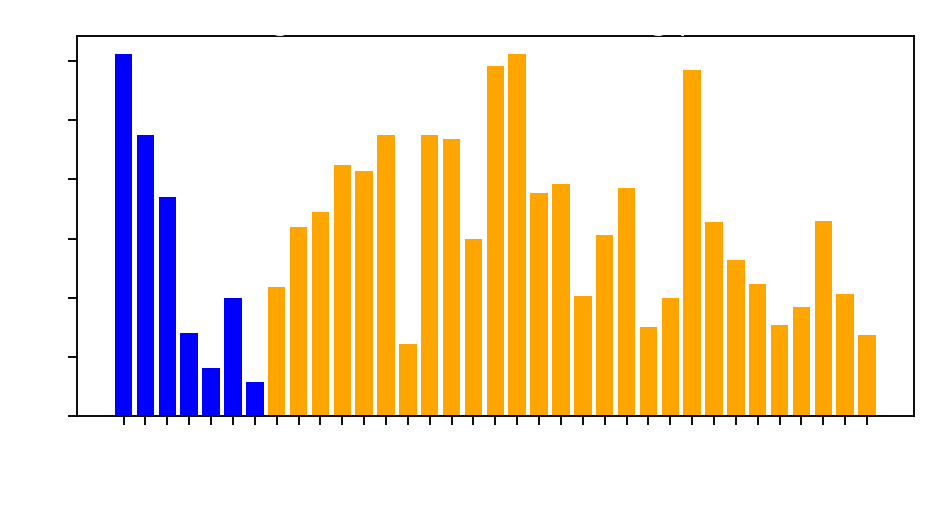

In [157]:
plt.figure(figsize=(15,7))
plt.bar(dataset['MS Zoning'], dataset['SalePrice'], color='blue')
plt.bar(dataset['Neighborhood'], dataset['SalePrice'], color='orange')
plt.title('Neighborhood and MS Zoning prices', size=30, color='white')
plt.xticks(size=15, color='white')
plt.yticks(size= 15, color='white')
plt.xticks(rotation=90);
plt.show()

In [158]:
dataset['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64

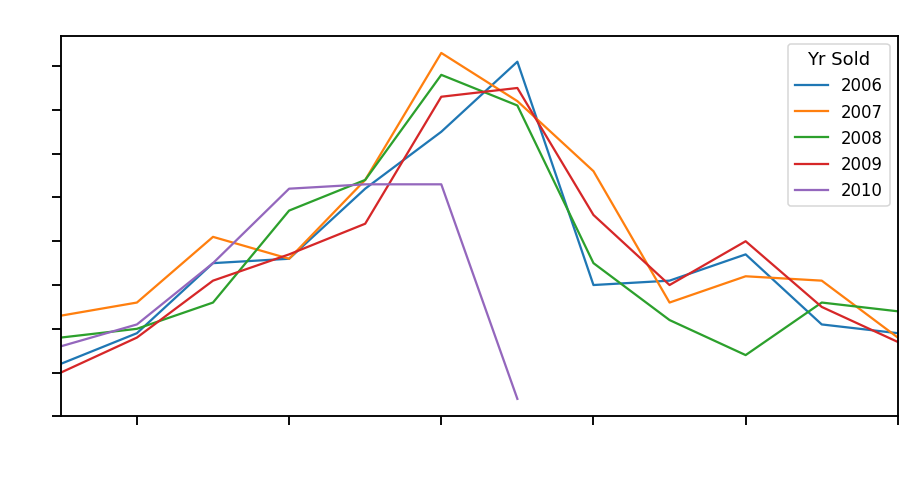

In [159]:
fig, ax = plt.subplots(figsize=(15,7))
dataset.groupby(['Mo Sold','Yr Sold']).count()['SalePrice'].unstack().plot(ax=ax)
plt.title('Month and Year of houses sold (count)', size=30, color='white')
plt.xticks(size=15, color='white')
plt.yticks(size= 15, color='white')
plt.xticks(rotation=90);
plt.xlabel('Months',color='white')
plt.ylabel('# Houses', color='white')
plt.show()

Text(0, 0.5, 'SalePrice')

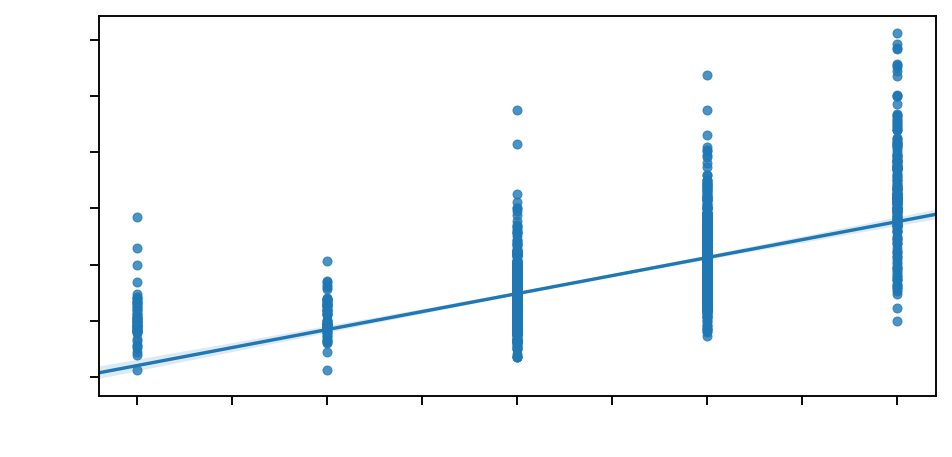

In [160]:
plt.figure(figsize=(15,7))
sns.set_context('talk')  #Everything is sized for a presentation
sns.regplot(x=dataset["Bsmt Qual"], y=dataset["SalePrice"])
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('TotRms AbvGrd',color='white')
plt.ylabel('SalePrice', color='white')

Text(0, 0.5, 'SalePrice')

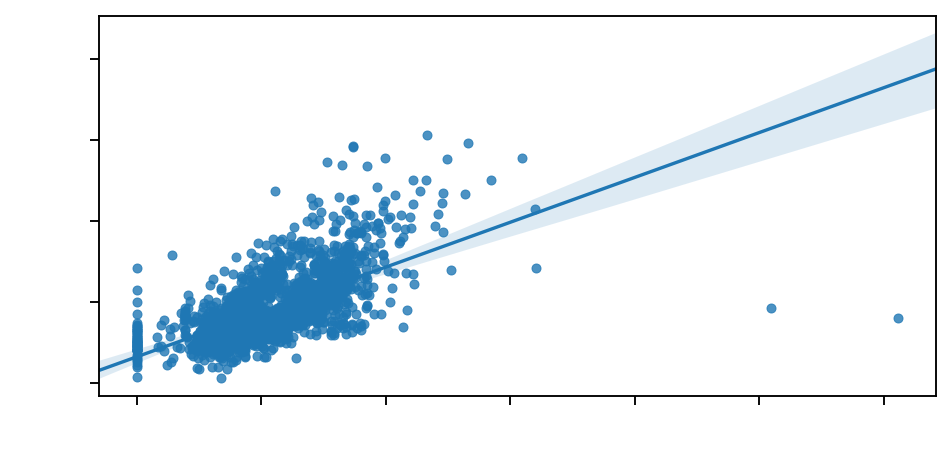

In [161]:
plt.figure(figsize=(15,7))
sns.set_context('talk')  #Everything is sized for a presentation
sns.regplot(x=dataset["Total Bsmt SF"], y=dataset["SalePrice"])
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('TotRms AbvGrd',color='white')
plt.ylabel('SalePrice', color='white')

Text(0, 0.5, 'SalePrice')

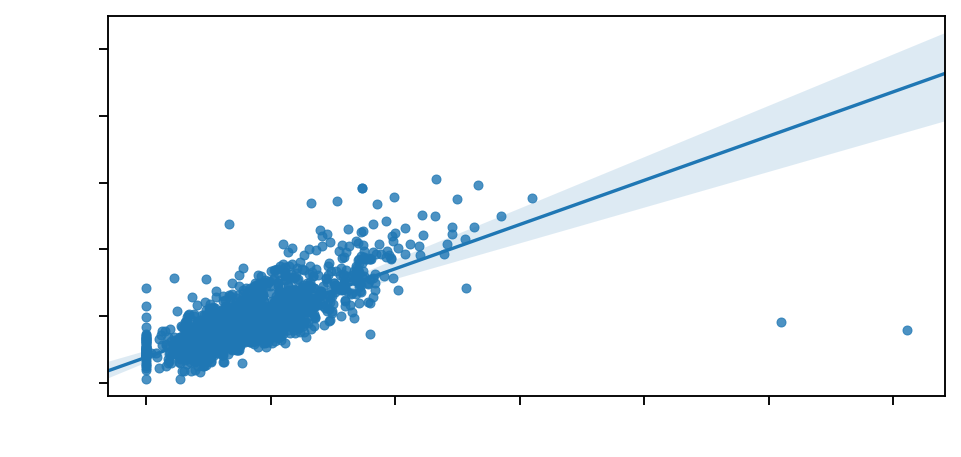

In [162]:
plt.figure(figsize=(15,7))
sns.set_context('talk')  #Everything is sized for a presentation
sns.regplot(x=dataset["Bsmt Qual* Total Bsmt SF"], y=dataset["SalePrice"])
plt.xticks(size=20, color='white')
plt.yticks(size= 15, color='white')
plt.xlabel('TotRms AbvGrd',color='white')
plt.ylabel('SalePrice', color='white')